In [1]:
import pandas as pd

### Load Dataset

In [3]:
train = pd.read_csv("Downloads/02-bike/train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv("Downloads/02-bike/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Preprocessing

#### Parse Datetime

In [9]:
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [10]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


### Explore

In [12]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

### datetime

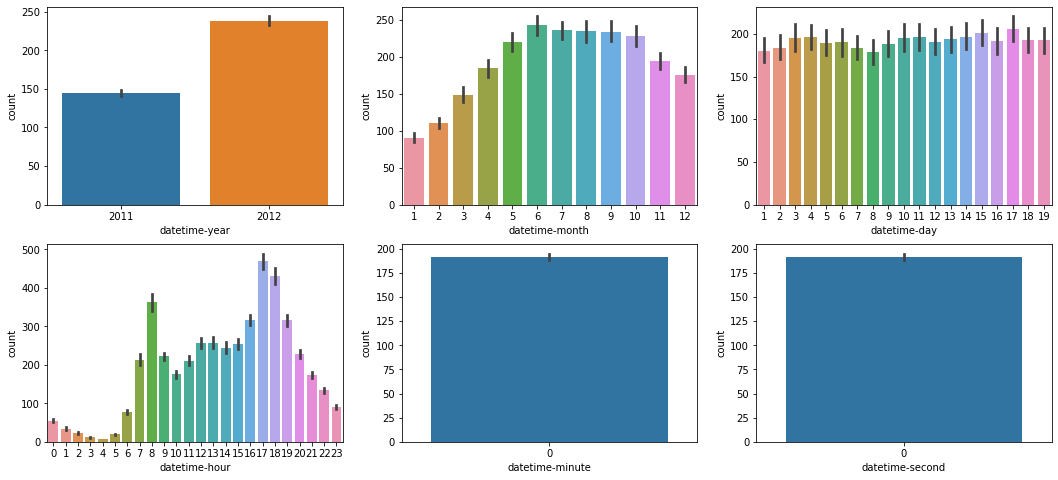

In [15]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18,8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [232]:
train["datetime-year_month"] = train["datetime-year"].astype('str') + '-' + train["datetime-month"].astype('str')

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 31)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


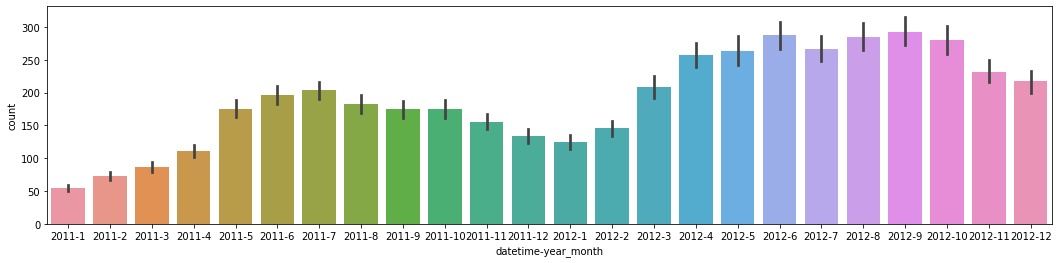

In [18]:
plt.figure(figsize=(18,4))

sns.barplot(data=train, x="datetime-year_month", y="count")

### 분석 결과

1. datetime-year : 2011년보다 2012년 대여량이 더 많은 것으로 보아, 회사가 성장하고 있음을 알 수 있음
2. datetime-month : 여름(6-8월)의 대여량이 가장 높고, 겨울(12-2월)의 대여량이 가장 낮음. 12월의 대여량이 1월 대여량의 2배 가까이 됨. 이는 2011년 1월과 2012년 12월의 대여량 차이에서 비롯된 것으로 보임.
3. datetime-day : 일별 대여량에 큰 차이가 나타나지 않음. 또한, train 데이터에는 1-19일까지의 데이터만 존재하고, test 데이터에는 20-31일의 데이터가 존재하기 때문에 자전거 대여량을 예측하는 feature로 사용될 수 없음
4. datetime-hour :  밤~새벽보다는 낮시간 동안의 대여량이 많고, 특히 출퇴근 시간대의 대여량이 높게 나타남.
5. datetime-minute, datetime-second : 분,초 단위는 기록이 되지 않았음을 알 수 있음. 따라서 feature로 사용하기 어려움

### 예측모델 개선방안

1. day, minute, second 컬럼은 feature로 사용하지 않는 것이 좋을 듯함
2. year_month 분석 결과, 12월의 대여량이 1월의 2배 가까이 되는 것은 회사가 성장함에 따라 발생한 2011년 1월과 2012년 12월 대여량의 차이에서 비롯된 것임을 알 수 있음. 실제로 2011년 12월과 2012년 1월의 대여량은 거의 차이가 없음. 이 트렌드를 고려하지 않은 month 컬럼을 feature로 사용할 경우, 머신러닝 알고리즘이 12월의 대여량을 높게 예측하는 결과를 가져올 수 있음. 
3. 따라서 year_month 컬럼을 사용하거나, 아예 month 컬럼을 feature로 사용하지 않는 방법을 선택할 수 있음

### weather

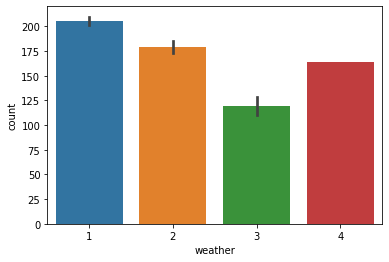

In [28]:
sns.barplot(data=train, x="weather", y="count")

In [29]:
train[train["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-year_month
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0,2012-01-01


In [30]:
test[test["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-year_month
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,0,0,2011-01-01
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,0,0,2011-08-01


### 분석결과

1. 날씨가 좋을수록(1에 가까울수록) 대여량이 많고, 날씨가 좋지 않을 수록(3에 가까울수록) 대여량이 감소함
2. 날씨가 4인 경우 3보다 대여량이 높게 나타나는데, 이는 모수의 부족(train 데이터 1개)으로 신뢰도가 낮은 결과라고 할 수 있음

### 예측모델 개선방안

1. 날씨 컬럼값이 1~3인 것만 봤을 때, 이 컬럼을 머신러닝 알고리즘에 feature로 넣으면 알아서 날시에 따른 자전거 대여량의 변화량을 예측할 수 있을 것임. 날씨가 좋을수록 자전거를 많이 빌리고, 안 좋을 수록 자전거를 덜 빌릴 것으로 예측할 것임
2. 날씨 4인 데이터를 제거하거나, 3으로 변경해주면 머신러닝 알고리즘이 상대적으로 모수가 적은 데이터를 가지고 조건을 만들려는 시도를 하지 않기 때문에 머신러닝 성능이 좋아질 것임
3. 날씨 컬럼은 연속적인 것처럼 보이지만, 범주형 데이터 같은 느낌도 있음. 다라서 One Hot Encoding을 한다면 머신러닝 알고리즘이 이 데이터를 범주형 데이터로 인식하여 성능이 향상될 가능성이 있음

In [33]:
train["weather_edit"] = train["weather"].replace(4, 3)

train["weather_1"] = train["weather_edit"] == 1
train["weather_2"] = train["weather_edit"] == 2
train["weather_3"] = train["weather_edit"] == 3

print(train.shape)
train[["weather", "weather_1", "weather_2", "weather_3"]].head()

(10886, 23)


,weather,weather_1,weather_2,weather_3
0,1,True,False,False
1,1,True,False,False
2,1,True,False,False
3,1,True,False,False
4,1,True,False,False


In [32]:
test["weather_edit"] = test["weather"].replace(4, 3)

test["weather_1"] = test["weather_edit"] == 1
test["weather_2"] = test["weather_edit"] == 2
test["weather_3"] = test["weather_edit"] == 3

print(test.shape)
test[["weather", "weather_1", "weather_2", "weather_3"]].head()

(6493, 20)


,weather,weather_1,weather_2,weather_3
0,1,True,False,False
1,1,True,False,False
2,1,True,False,False
3,1,True,False,False
4,1,True,False,False


### Windspeed

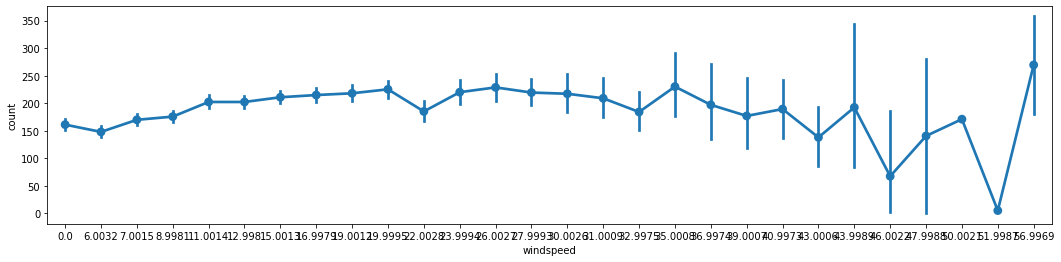

In [49]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="windspeed", y="count")

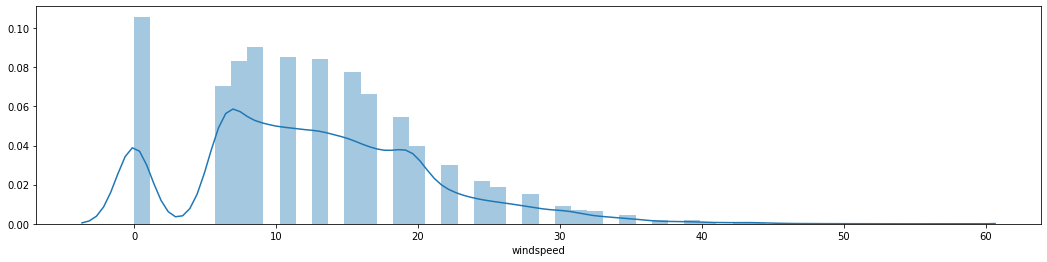

In [52]:
plt.figure(figsize=(18,4))

sns.distplot(train["windspeed"])

In [36]:
train["windspeed"].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

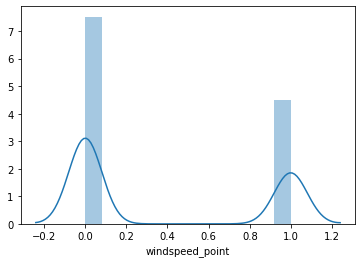

In [120]:
train["windspeed_point"] = train["windspeed"] - train["windspeed"].astype('int')

sns.distplot(train["windspeed_point"])

### 분석결과

1. 전반적으로 정규분포의 형태를 보이지만, 값이 연속적이지 않은 것으로 보아 범주형 데이터로 보여짐
2. distplot에서 0의 관측치가 매우 높고, 그 다음 관측치인 6까지의 데이터가 비어 있음
3. 풍속 데이터의 소수점 아래 숫자가 0 또는 1에 가까운 2가지 숫자로 나뉘어 있음
4. 또한 풍속이 과하게 높을 때는 자전거를 덜 빌리는 현상이 나타나는데, 모수가 부족해 신뢰도가 낮음. 다만 풍속이 낮을 때는 자전거를 덜 빌리는 현상이 나타나고 있음

###  예측모델 개선방안

1. 이 풍속 데이터를 머신러닝 알고리즘에 집어넣으면 알아서 풍속에 따른 자전거 대여량의 변화를 판단할 수 있을 것으로 예상. 풍속이 낮거나 높을수록 자전거를 덜 빌리고, 풍속이 적당할 때 자전거를 더 많이 빌린다는 사실을 알 수 있음
2. NaN 값을 전부 0으로 처리한 것으로 보이므로, 주변 풍속값들에 맞추어 결측치를 보간하는 방법을 사용한다면 머신러닝 알고리즘 성능을 개선할 수 있을 것으로 생각됨
3. 풍속 데이터를 정수형 데이터로 만들어 feature로 넣어주면 더 좋은 결과가 나올 수도 있음

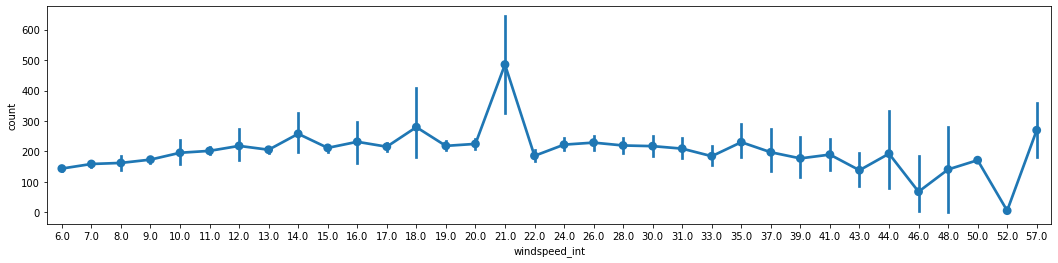

In [121]:
import numpy as np
train["windspeed_nan"] = train["windspeed"].replace(0, np.nan)
train["windspeed_nan"] = train["windspeed_nan"].interpolate(method='linear')

train["windspeed_int"] = train["windspeed_nan"].round()
train["windspeed_int"] = train["windspeed_int"].fillna(6.0)

plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="windspeed_int", y="count")

In [124]:
import numpy as np
test["windspeed_nan"] = test["windspeed"].replace(0, np.nan)
test["windspeed_nan"] = test["windspeed_nan"].interpolate(method='linear')

test["windspeed_int"] = test["windspeed_nan"].round()

### temp

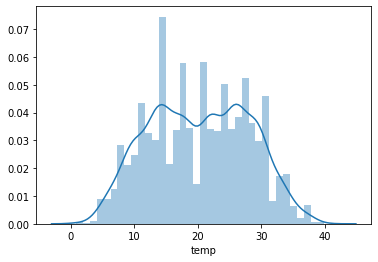

In [140]:
sns.distplot(train["temp"])

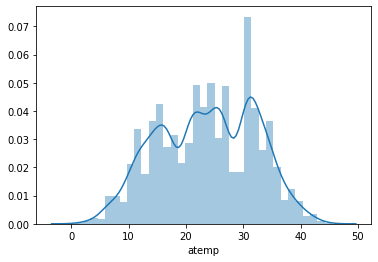

In [141]:
sns.distplot(train["atemp"])

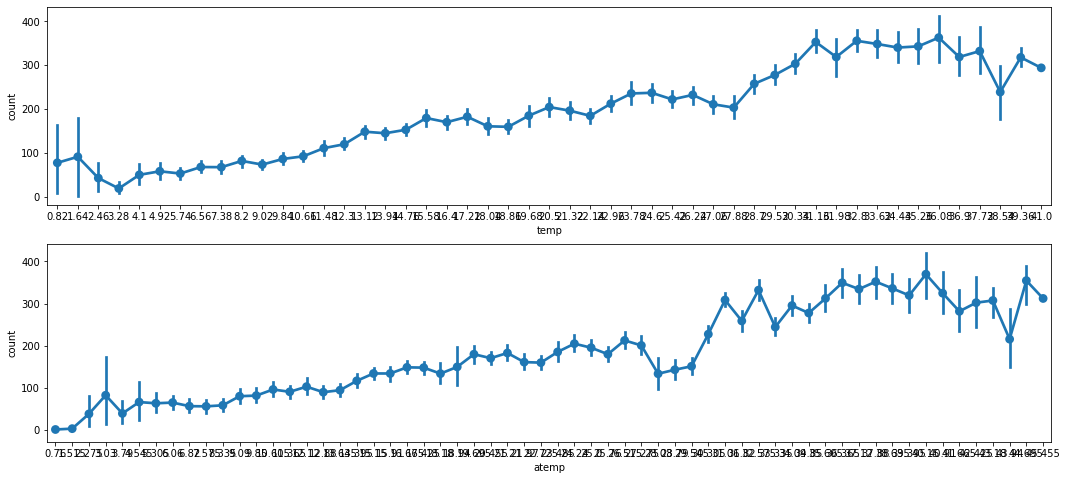

In [130]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,8)

sns.pointplot(data=train, x="temp", y="count", ax=ax1)
sns.pointplot(data=train, x="atemp", y="count", ax=ax2)

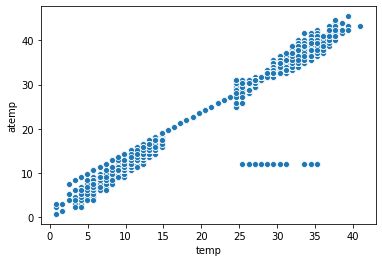

In [139]:
sns.scatterplot(data=train, x="temp", y="atemp")

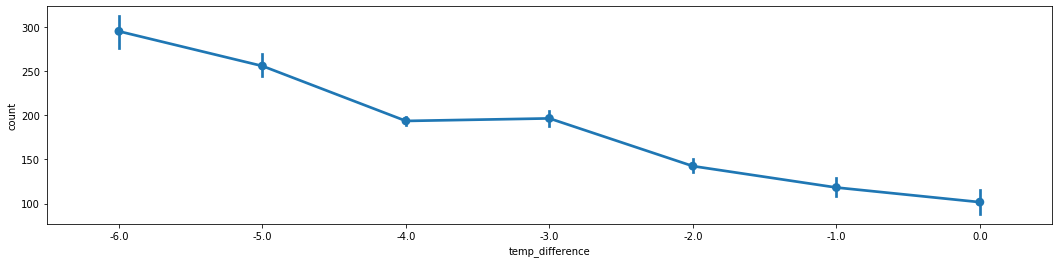

In [143]:
train["temp_int"] = train["temp"].round()
train["atemp_int"] = train["atemp"].round()

train["temp_difference"] = train["temp_int"] - train["atemp_int"]

train.loc[train["temp_difference"] > 0, "temp_difference"] = 0
train.loc[train["temp_difference"] < -6, "temp_difference"] = -6

plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="temp_difference", y="count")

### 분석결과

1. 온도와 체감온도는 연속형 데이터로, 서로 상관관계가 높음.
2. 전반적으로 온도나 체감온도가 낮을수록 자전거를 덜 빌리고, 높아질수록 자전거를 많이 빌리는 현상이 나타나고 있음
2. 체감온도가 온도보다 높을수록 자전거를 더 많이 빌리는 현상이 나타남

### 예측모델 개선방안

1. 온도 컬럼을 feature로 사용하면, 머신러닝 알고리즘이 온도 변화에 따른 자전거 대여량의 변화를 스스로 학습할 것으로 예상됨. 온도가 낮을수록 자전거를 덜 빌리고, 온도가 상승함에 따라 자전거 대여량이 많은 것으로 예측할 것임
2. 체감온도 역시 자전거 대여량을 예측하는 데 도움이 되겠지만, 온도와 체감온도 사이에는 선형관계가 존재하기 때문에 둘다 feature로 사용하면 머신러닝 알고리즘이 향상되지는 못할 것임
3. 또한 온도와 체감온도의 차이가 자전거 대여량을 예측하는 데 도움이 된다는 사실을 알 수 있음. 이 정보를 머신러닝 알고리즘에 넣어주면 머신러닝의 성능 향상을 꾀할 수 있을 것임

In [149]:
test["temp_int"] = test["temp"].round()
test["atemp_int"] = test["atemp"].round()

test["temp_difference"] = test["temp_int"] - test["atemp_int"]

### dayofweek

In [153]:
train["datetime-dayofweek"] = train["datetime"].dt.weekday

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 30)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


In [154]:
test["datetime-dayofweek"] = test["datetime"].dt.weekday

print(test.shape)
test[["datetime", "datetime-dayofweek"]].head()

(6493, 26)


,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,3
1,2011-01-20 01:00:00,3
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3


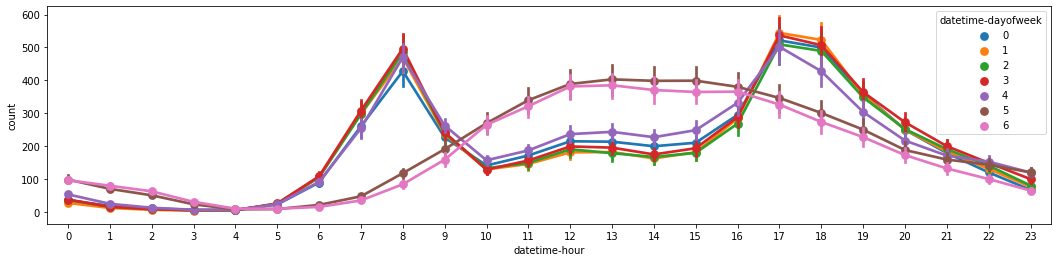

In [155]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek")

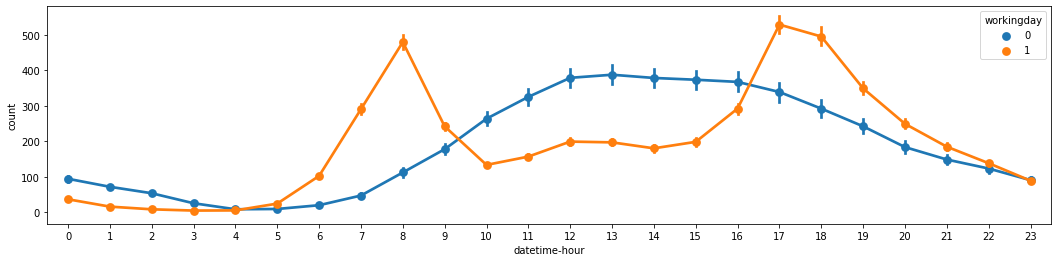

In [156]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

### 분석결과

1. 평일의 경우 출퇴근 시간(6-10시)에 자전거를 많이 빌리고, 주말의 경우 낮 시간(10-16시)에 자전거를 많이 빌림
2. 주말 중에서도 토요일이 일요일보다 대여량이 많고(다음날 출근 부담이 있는 일요일보다는 부담없는 토요일에 야외활동을 하는 사람들이 많기 때문으로 예상), 평일 중에서도 주말과 가까운 금요일과 월요일의 대여량이 많은 것으로 나타남
3. 금요일은 같은 주중이라고 하더라도 낮 시간대(10-16시)의 대여량이 높고, 퇴근시간대(18-20대)의 자전거 대여량이 낮게 나타남

### 예측모델 개선방안

1. 요일 컬럼을 feature로 사용한다면, 머신러닝 알고리즘이 요일에 따른 자전거 변화량의 차이를 이해하여 성능이 개선될 것으로 예상됨
2. 구체적으로는 같은 주말이라고 하더라도 토요일과 일요일의 차이, 같은 주중이더라도 수요일과 월요일의 차이를 이해하기 시작할 것임. 따라서 workingday 컬럼만 넣는 것보다 요일 컬럼을 같이 넣는 것이 더 좋은 성능을 낼 것임
3. 이 데이터는 범주형 데이터이므로 One Hot Encoding을 해서 넣어주는 것이 머신러닝 알고리즘이 이해하기 쉽고, 더 좋은 성능을 낼 것으로 예상함

### Casual & Registered

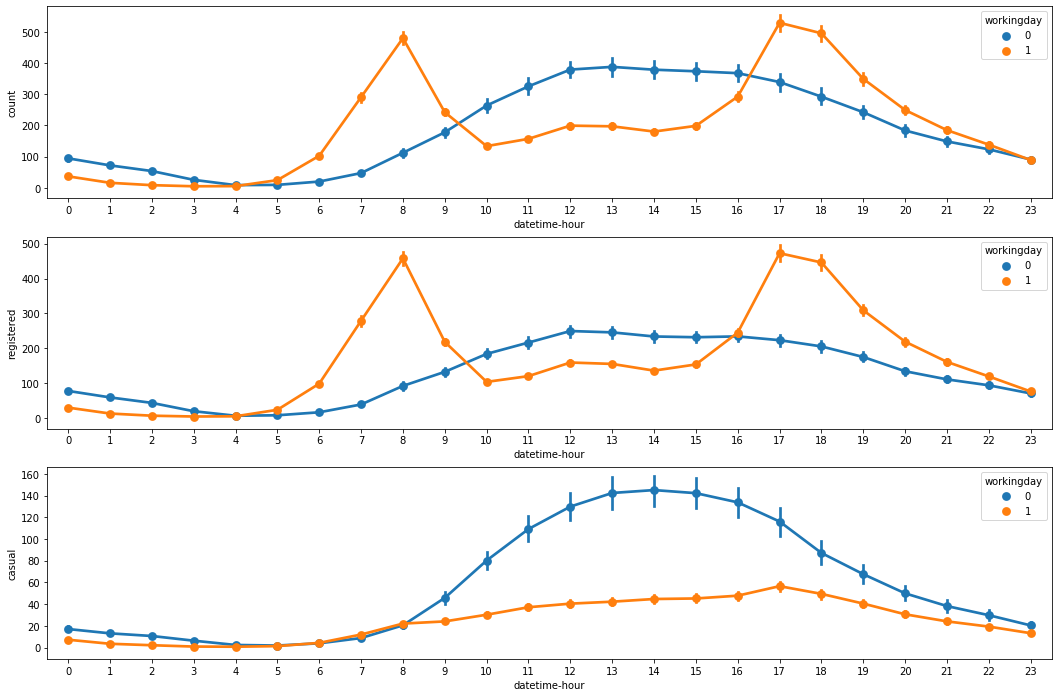

In [258]:
figure,((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,12)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday", ax=ax3)

### 분석결과

1. 시간에 따른 자전거 대여량 분석 결과, 회원과 비회원 간 차이가 뚜렷하게 나타남
2. 회원은 주로 출퇴근 시간에 자전거를 빌리고, 비회원은 주로 주말에 놀 때 빌린다는 사실을 알 수 있음
3. 세로축을 보면, 비회원보다는 회원의 자전거 대여량이 훨씬 많다는 사실을 알 수 있음

### 예측모델 개선방안

1. 회원과 비회원 컬럼을 feature로는 사용할 수 없지만, 회원과 비회원을 label로 사용하여 각각의 대여량을 예측 후 더하는 방식을 사용할 수 있음
2. 또는 비회원, 회원, count 컬럼 3개를 동시에 예측해서 이를 섞어서 사용하는 방법도 고려해볼 수 있음

### humidity

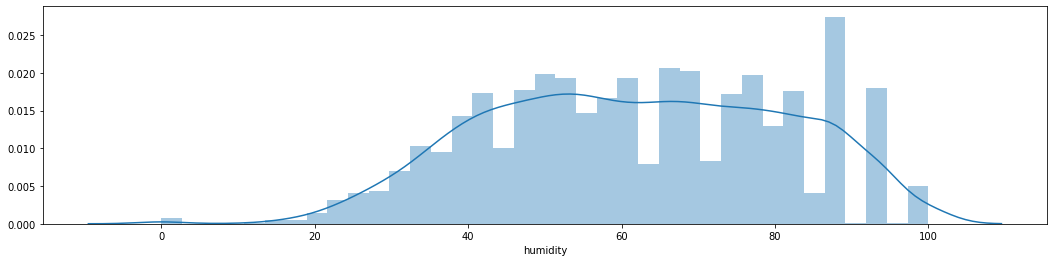

In [302]:
plt.figure(figsize=(18,4))
sns.distplot(train["humidity"])

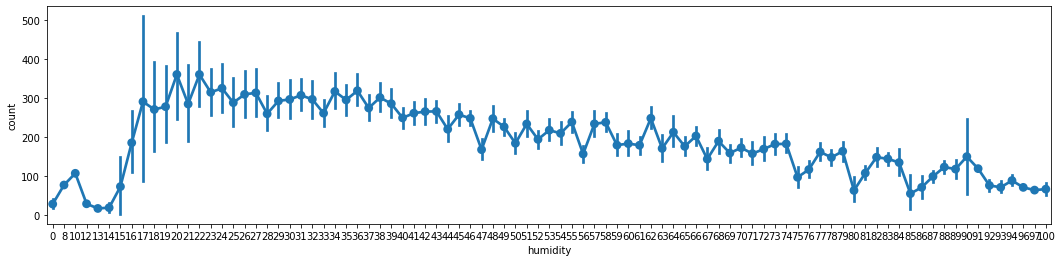

In [276]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="humidity", y="count")

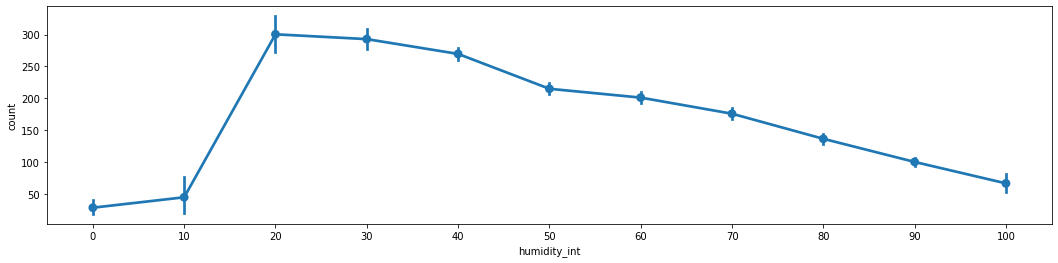

In [298]:
train["humidity_int"] = train["humidity"].round(-1)

#train.loc[train["humidity_int"]<20, "humidity_int"] = 20

plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="humidity_int", y="count")

In [300]:
train["humidity_int"].value_counts()

60     1977
50     1675
80     1671
40     1609
70     1588
90     1383
30      615
20      190
100     150
0        22
10        6
Name: humidity_int, dtype: int64

### 분석결과

1. 습도는 연속형 데이터로서 전반적으로 정규분포 되어 있지만, 습도 90-100 구간 중 일부가 비어있음
2. 이를 해결하기 위해 습도를 10의 단위로 범주화 하여 분석한 결과, 습도가 높을수록 자전거 대여량이 낮아진다는 사실을 알 수 있음. 이는 추측컨데, 습도가 높을 경우 활동적인 야외활동을 할 때 땀이 많이 나기 때문에 자전거를 빌리는 사람이 줄어들고, 나아가 습도가 90-100 정도 되면 비가 온다는 것을 의미하므로 자전거 대여량이 감소하는 것이라고 생각됩니다.
3. 하지만 습도가 20 이하로 낮은 구간에서는 오히려 자전거 대여량이 감소하는 현상이 나타남

### 예측모델 개선방안

1. 습도 컬럼을 feature로 사용할 경우, 습도 변화에 따른 자전거 대여량의 변화를 머신러닝 알고리즘이 알아서 학습할 수 있을 것이라고 예상됨. 습도가 20 이하인 구간에서는 습도가 낮아질 수록 자전거를 덜 빌리고, 나머지 구간에서는 습도가 높아질수록 자전거를 덜 빌리는 것으로 예상할 것임

### Train

In [373]:
feature_names = ["season", "holiday", "workingday", "weather_1", "weather_2", "weather_3",
                 "temp", "atemp", "humidity", "windspeed_int",
                "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather_1',
 'weather_2',
 'weather_3',
 'temp',
 'atemp',
 'humidity',
 'windspeed_int',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [374]:
label_r = "registered"
label_c = "casual"

print(label_r)
print(label_c)

registered
casual


In [375]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 13)


,season,holiday,workingday,weather_1,weather_2,weather_3,temp,atemp,humidity,windspeed_int,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,True,False,False,9.84,14.395,81,6.0,2011,0,5
1,1,0,0,True,False,False,9.02,13.635,80,6.0,2011,1,5
2,1,0,0,True,False,False,9.02,13.635,80,6.0,2011,2,5
3,1,0,0,True,False,False,9.84,14.395,75,6.0,2011,3,5
4,1,0,0,True,False,False,9.84,14.395,75,6.0,2011,4,5


In [376]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 13)


,season,holiday,workingday,weather_1,weather_2,weather_3,temp,atemp,humidity,windspeed_int,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,True,False,False,10.66,11.365,56,26.0,2011,0,3
1,1,0,1,True,False,False,10.66,13.635,56,21.0,2011,1,3
2,1,0,1,True,False,False,10.66,13.635,56,16.0,2011,2,3
3,1,0,1,True,False,False,10.66,12.880,56,11.0,2011,3,3
4,1,0,1,True,False,False,10.66,12.880,56,11.0,2011,4,3


In [347]:
y_train_r = train[label_r]

print(y_train_r.shape)
y_train_r.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [348]:
y_train_c = train[label_c]

print(y_train_c.shape)
y_train_c.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [436]:
label_count = "count"

y_train = train[label_count]
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### Use Random Forest

In [417]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 20,
                             n_jobs = -1,
                             random_state = 37,
                             )

model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

### Grid Search

In [439]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [452]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=37, n_jobs = -1)

rf_random.fit(X_train, y_train_r)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [453]:
rf_random.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [454]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=37, n_jobs = -1)

rf_random.fit(X_train, y_train_c)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [455]:
rf_random.best_params_

{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [466]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
                             n_estimators = 90,
                             n_jobs = -1,
                             random_state = 37,
                             min_samples_split = 5,
                             min_samples_leaf = 1,
                             max_depth = 40
                              
                             )

model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

### Evaluate

In [467]:
from sklearn.model_selection import cross_val_predict

y_predict_r = cross_val_predict(model, X_train, y_train_r, cv = 20)

print(y_predict_r.shape)
y_predict_r

(10886,)


array([ 27.24195326,  21.38274651,  17.93479197, ..., 178.34961199,
       159.65414462, 115.61461199])

In [468]:
y_predict_c = cross_val_predict(model, X_train, y_train_c, cv = 20)

print(y_predict_c.shape)
y_predict_c

(10886,)


array([ 4.99904762,  3.87458995,  3.90410935, ..., 11.66393939,
       17.16604377, 12.43486091])

In [469]:
y_predict = y_predict_r + y_predict_c

print(y_predict.shape)
y_predict

(10886,)


array([ 32.24100088,  25.25733646,  21.83890131, ..., 190.01355139,
       176.82018839, 128.0494729 ])

In [470]:
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_train, y_predict)
score = np.sqrt(score)

print(f"Score = {score:.5f}")

Score = 0.37324


### Fit & Predict

In [471]:
model.fit(X_train, y_train_c)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [472]:
predict_c = model.predict(X_test)

print(predict_c.shape)
predict_c

(6493,)


array([1.93227513, 0.63309524, 1.02784392, ..., 3.7565388 , 3.37449254,
       2.10463564])

In [473]:
model.fit(X_train, y_train_r)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=-1, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [474]:
predict_r = model.predict(X_test)

print(predict_r.shape)
predict_r

(6493,)


array([10.68407207,  2.8135117 ,  1.69782187, ..., 99.09435626,
       96.51820547, 46.81920635])

In [475]:
predict = predict_c + predict_r

print(predict.shape)
predict

(6493,)


array([ 12.6163472 ,   3.44660694,   2.72566578, ..., 102.85089506,
        99.89269801,  48.92384199])

### Submit

In [476]:
submit = pd.read_csv("Downloads/02-bike/sampleSubmission.csv")

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [477]:
submit["count"] = predict
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.616347
1,2011-01-20 01:00:00,3.446607
2,2011-01-20 02:00:00,2.725666
3,2011-01-20 03:00:00,2.469127
4,2011-01-20 04:00:00,2.213228


In [478]:
submit.to_csv("Downloads/baseline_0.37324.csv", index=False)